# Популяция населения Казахстана

##### Импортируем основные библиотеки, необходимые для работы с данными

In [1]:
import numpy as np  
import pandas as pd 
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

##### Установим библиотеку Folium для работы с картами и импортируем ее

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


##### Загрузим данные и отобразим их

In [3]:
df_kz=pd.read_excel("Kazakhstan_population_2019.xlsx")
df_kz

,Territory,Count,lat,long
0,Akmola region,738587,51.852068,70.351112
1,Aktobe region,869637,48.568976,58.789199
2,Almaty region,2038934,44.834059,78.360620
3,Atyrau region,633791,47.546872,52.229706
4,West Kazakstan region,652325,50.038795,51.215119
5,Zhambyl region,1125442,44.289255,71.973447
6,Karagandy region,1378533,48.113300,71.445020
7,Kostanay region,872795,52.038977,63.513129
8,Kyzylorda region,794334,45.188231,63.614362
9,Mangystau region,678199,44.084428,53.714919


##### Исключим данные долготы и широты для построения диаграмм. Также в качестве индекса установим колонку Territory

In [4]:
df_kz.drop(["lat", "long"], axis=1, inplace=True)
df_kz.set_index('Territory', inplace=True)
df_kz

,Count
Territory,
Akmola region,738587
Aktobe region,869637
Almaty region,2038934
Atyrau region,633791
West Kazakstan region,652325
Zhambyl region,1125442
Karagandy region,1378533
Kostanay region,872795
Kyzylorda region,794334


### Столбиковая диаграмма

##### Построим столбиковую диаграмму, которая показывает распределение населения Казахстана по регионам

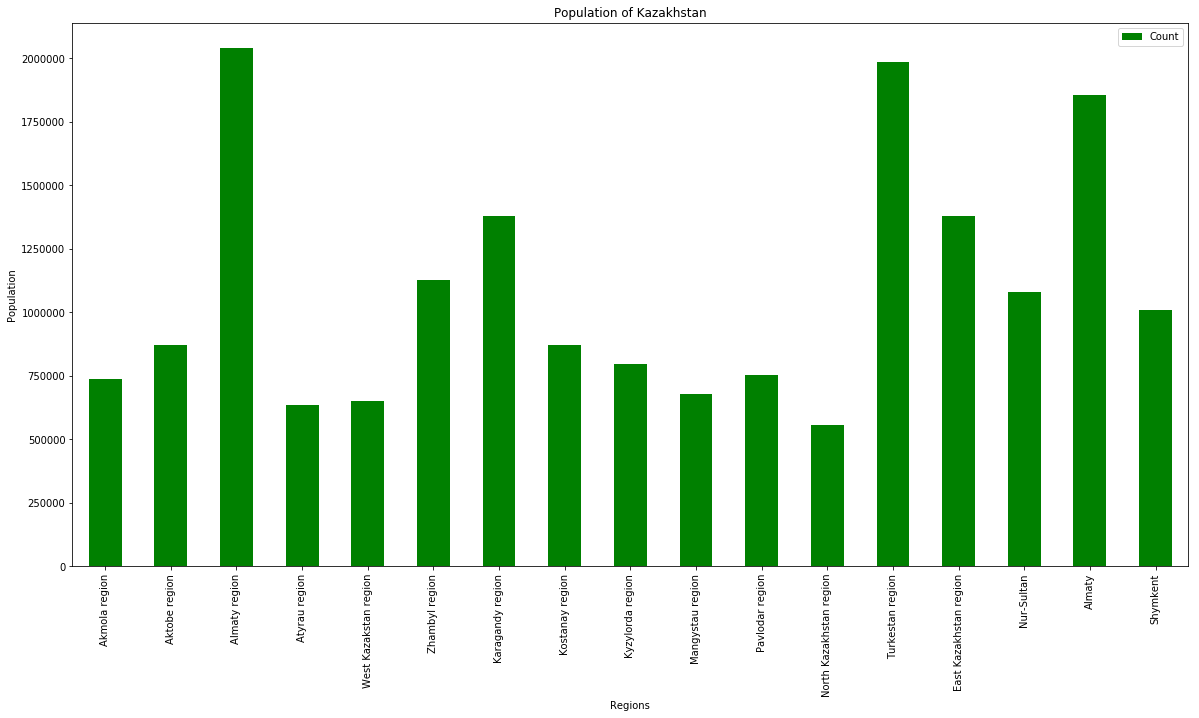

In [5]:
df_kz.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10),
            color='g',
            label=df_kz['Count']
             )

plt.title('Population of Kazakhstan')
plt.ylabel('Population')
plt.xlabel('Regions')
plt.show()

### Круговая диаграмма

##### Построим круговую диаграмму, где будут выделены регионы с наибольшим количеством проживающих там людей, то есть Almaty region, Turkestan region и Almaty

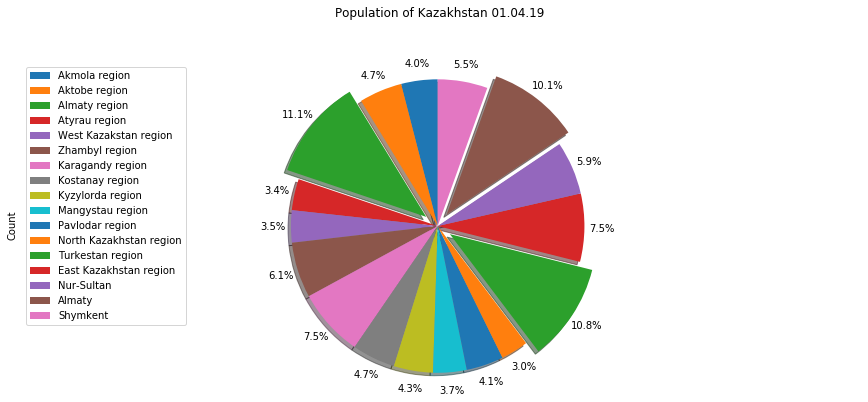

In [6]:
explode_list = [0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0.1, 0]
df_kz['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('Population of Kazakhstan 01.04.19', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_kz.index, loc='upper left') 

plt.show()

### Вафельная диаграмма

«Вафельный график» - это интересная визуализация, которая обычно создается для отображения прогресса в достижении целей. Обычно это эффективный вариант, когда вы пытаетесь добавить интересные визуализационные функции к визуалу, который состоит в основном из ячеек, таких как панель инструментов Excel.

In [7]:
from PIL import Image # converting images into arrays
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

К сожалению, в отличие от R, вафельные диаграммы не встроены ни в одну из библиотек визуализации Python. Поэтому мы научимся создавать их с нуля.

**Шаг 1.** Первым шагом в создании вафельной диаграммы является определение доли каждой категории по отношению к итогу.

In [8]:
total_values = sum(df_kz['Count'])
category_proportions = [(int(value) / total_values) for value in df_kz['Count']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_kz.index.values[i] + ': ' + str(proportion))

Akmola region: 0.04015027098648278
Aktobe region: 0.04727426993688207
Almaty region: 0.11083833403993473
Atyrau region: 0.0344534637067724
West Kazakstan region: 0.03546098905241681
Zhambyl region: 0.061180065827816016
Karagandy region: 0.07493832617390918
Kostanay region: 0.0474459417315052
Kyzylorda region: 0.04318072935724134
Mangystau region: 0.036867523572391106
Pavlodar region: 0.040980144835981405
North Kazakhstan region: 0.03014405590216382
Turkestan region: 0.10785027718906408
East Kazakhstan region: 0.07493800000837159
Nur-Sultan: 0.05862194951642426
Almaty: 0.10082081188364567
Shymkent: 0.054854846278997546


**Шаг 2.** Второй шаг - определение общего размера диаграммы «вафель».

In [9]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Шаг 3.** Третий шаг - использование пропорции каждой категории для определения соответствующего количества плиток.

In [10]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_kz.index.values[i] + ': ' + str(tiles))

Akmola region: 16
Aktobe region: 19
Almaty region: 44
Atyrau region: 14
West Kazakstan region: 14
Zhambyl region: 24
Karagandy region: 30
Kostanay region: 19
Kyzylorda region: 17
Mangystau region: 15
Pavlodar region: 16
North Kazakhstan region: 12
Turkestan region: 43
East Kazakhstan region: 30
Nur-Sultan: 23
Almaty: 40
Shymkent: 22


Исходя из рассчитанных пропорций, Акмолинская область будет занимать 16 плиток «вафельной» диаграммы, Актюбинская область - 19 плиток, Алматинская область - 44 плитки и т.д.

**Шаг 4.** Четвертый шаг - создание матрицы, напоминающей «вафельную» диаграмму, и заполнение ее.

In [11]:
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Давайте посмотрим, как выглядит матрица.

In [12]:
waffle_chart

array([[ 1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  4.,  5.,  6.,  6.,
         6.,  7.,  7.,  7.,  8.,  9.,  9., 10., 10., 11., 12., 13., 13.,
        13., 13., 13., 14., 14., 14., 15., 15., 16., 16., 16., 16., 17.,
        17.],
       [ 1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  4.,  5.,  6.,  6.,
         7.,  7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 12., 13., 13.,
        13., 13., 13., 14., 14., 14., 15., 15., 16., 16., 16., 16., 17.,
        17.],
       [ 1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  4.,  5.,  6.,  6.,
         7.,  7.,  7.,  8.,  8.,  9.,  9., 10., 11., 11., 12., 13., 13.,
        13., 13., 13., 14., 14., 14., 15., 15., 16., 16., 16., 16., 17.,
        17.],
       [ 1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  5.,  5.,  6.,  6.,
         7.,  7.,  7.,  8.,  8.,  9.,  9., 10., 11., 11., 12., 13., 13.,
        13., 13., 14., 14., 14., 15., 15., 15., 16., 16., 16., 16., 17.,
        17.],
       [ 1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  5.,  5.,  6., 

Как и ожидалось, матрица состоит из семнадцати категорий, и общее количество экземпляров каждой категории соответствует общему количеству фрагментов, выделенных для каждой категории.

**Шаг 5.** Отображение матрицы вафельных диаграмм в визуал.

<Figure size 432x288 with 0 Axes>

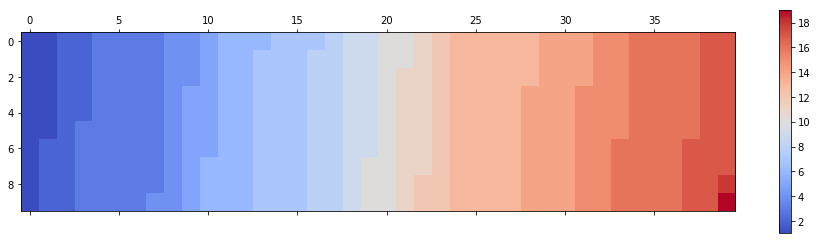

In [13]:
fig = plt.figure()

# use matshow to display the waffle chart
colors_list = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colors_list)
plt.colorbar()

**Шаг 6.** Украшение графика.

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

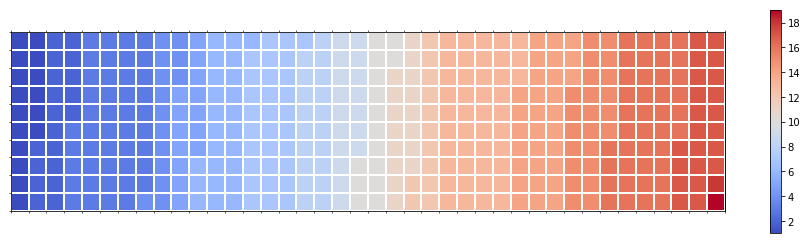

In [14]:
fig = plt.figure()

# use matshow to display the waffle chart
colors_list = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colors_list)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Шаг 7.** Создание легенды и добавление ее в график.

<Figure size 432x288 with 0 Axes>

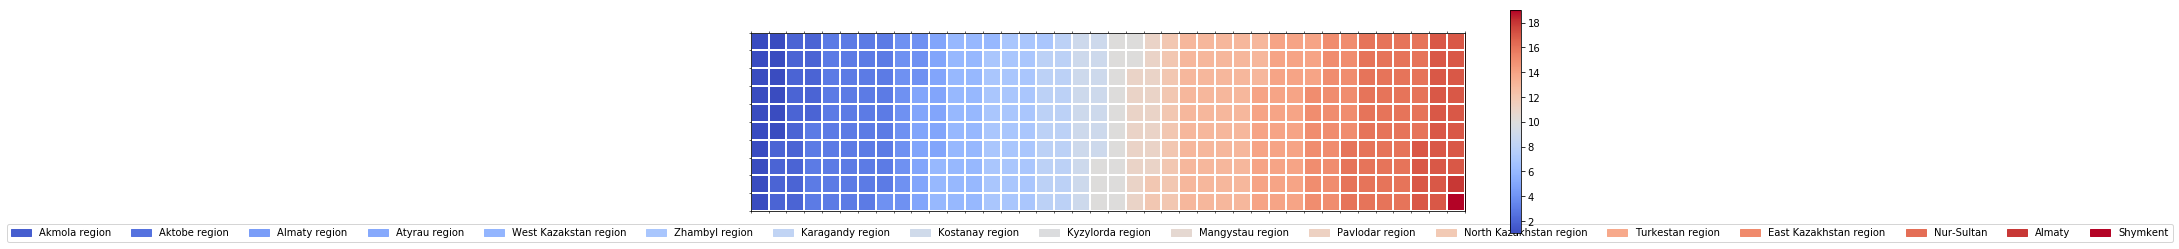

In [15]:
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_kz['Count'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_kz.index.values):
    label_str = category# + ' (' + str(df_kz['Count'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_kz.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

### Отображение карты

##### Теперь отобразим карту Казахстана

In [16]:
# define Kazakhstan's geolocation coordinates
kz_latitude = 48.516605
kz_longitude = 68.988455

# define the world map centered around Kazakhstan with a higher zoom level
kz_map = folium.Map(location=[kz_latitude, kz_longitude], zoom_start=5)

 # display Kazakhstan map
kz_map

In [17]:
# create a Stamen Toner map of the world centered around Kazakhstan
kz_map = folium.Map(location=[kz_latitude, kz_longitude], zoom_start=5, tiles='Stamen Toner')

# display map
kz_map

In [18]:
# create a Stamen Toner map of the world centered around Kazakhstan
kz_map = folium.Map(location=[kz_latitude, kz_longitude], zoom_start=5, tiles='Stamen Terrain')

# display map
kz_map

In [19]:
df_kz=pd.read_excel("Kazakhstan_population_2019.xlsx")

# instantiate a feature group for the incidents in the dataframe
count = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_kz.lat, df_kz.long):
    count.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
kz_map.add_child(count)

In [20]:
df_kz=pd.read_excel("Kazakhstan_population_2019.xlsx")

# instantiate a feature group for the incidents in the dataframe
count = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_kz.lat, df_kz.long):
    count.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_kz.lat)
longitudes = list(df_kz.long)
labels = map(str,list(df_kz.Count))

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(kz_map)    
    
# add incidents to map
kz_map.add_child(count)